データの準備


In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
print(X.shape, y.shape)
print(X)
print(y)

(1797, 64) (1797,)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [3]:
import torch

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)


アーキテクチャ・目的関数・最適化手法の定義

In [6]:
from torch import nn, optim

model = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10),
    nn.ReLU(),
)
model.train()
lossfun = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


学習の実行

In [8]:
losses = []

for ep in range(100):
  optimizer.zero_grad()
  #yの予測値を算出
  out = model(X)

  #損失を計算
  loss = lossfun(out, y)
  loss.backward()

  #勾配を更新
  optimizer.step()

  losses.append(loss.item())
  _, pred = torch.max(out, 1)
  print((pred == y).sum().item()/len(y))
  

0.6772398441847524
0.6805787423483584
0.6828046744574291
0.6861435726210351
0.6894824707846411
0.6922648859209795
0.6933778519755147
0.6967167501391207
0.6978297161936561
0.7017250973845298
0.7033945464663328
0.7056204785754034
0.7056204785754034
0.7089593767390094
0.7100723427935448
0.7111853088480802
0.7117417918753478
0.7134112409571508
0.7150806900389538
0.7161936560934892
0.7173066221480244
0.7184195882025598
0.7195325542570952
0.7206455203116305
0.7206455203116305
0.7212020033388982
0.7223149693934335
0.7223149693934335
0.7234279354479688
0.7234279354479688
0.7234279354479688
0.7234279354479688
0.7239844184752365
0.7245409015025042
0.7256538675570395
0.7262103505843072
0.7273233166388425
0.7273233166388425
0.7273233166388425
0.7278797996661102
0.7284362826933779
0.7306622148024485
0.7323316638842515
0.7328881469115192
0.7328881469115192
0.7345575959933222
0.7356705620478575
0.7367835281023929
0.7367835281023929
0.7378964941569283
0.7384529771841959
0.7395659432387313
0.7406789092

Text(0, 0.5, 'loss')

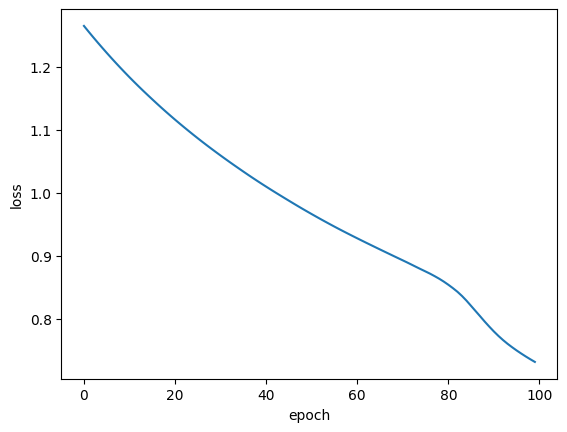

In [9]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')